Name: **Zhenmin Hua**  
USC_ID: **5905057247**  
Github username: **Zeddhua2077**

# 552_hw8

In [1]:
import math
from scipy import stats
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn import svm
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
import warnings
warnings.filterwarnings('ignore')

## Supervised, Semi-Supervised, and Unsupervised Learning

### (a) download

In [95]:
df = pd.read_csv('../data/wdbc.data', header=None)
df.pop(0)
df[1] = df[1].map({'M': 1, 'B': 0}) # 1 for malignant and 0 for benign
df

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### (b) Monte-Carlo Simulation

In [96]:
test_set = pd.concat([df[df[1]==1].sample(frac=0.2), df[df[1]==0].sample(frac=0.2)], axis=0).reset_index(drop=True)
train_set = df.append(test_set).drop_duplicates(keep=False).reset_index(drop=True)

#### (i)  Supervised Learning

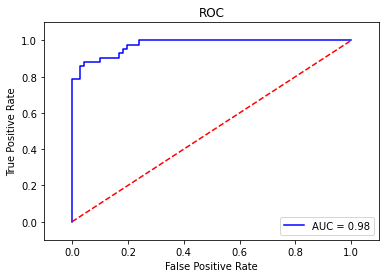

confusion_matrix_train: 
 [[277   9]
 [ 20 150]]
confusion_matrix_test: 
 [[69  2]
 [ 8 34]]
average_accuracy: 0.9103244837758114
average_precision: 0.9442328042328039
average_recall: 0.8063492063492066
average_f1: 0.86984126984127
average_auc: 0.88909009613235


In [97]:
accuracy_list = []
precision_list = []
recall_list = []
f1_score_list = []
auc_list = []

for _ in range(30):

    x_train = train_set.iloc[:, 1:]
    x_train = preprocessing.normalize(x_train)
    y_train = train_set.iloc[:, :1]

    x_test = test_set.iloc[:, 1:]
    x_test = preprocessing.normalize(x_test)
    y_test = test_set.iloc[:, :1]

    # grid search for best C
    grid = GridSearchCV(svm.LinearSVC(penalty='l1', dual=False), param_grid={'C':[0.01, 0.1, 1, 10]}, cv=5)
    grid.fit(x_train, y_train)

    # model
    model = svm.LinearSVC(penalty='l1', C=grid.best_params_['C'], dual=False)
    model.fit(x_train, y_train)

    # predict
    y_pred_train = model.predict(x_train)
    y_pred = model.predict(x_test)
    
    accuracy_list.append(accuracy_score(y_test, y_pred))
    precision_list.append(precision_score(y_test, y_pred))
    recall_list.append(recall_score(y_test, y_pred))
    f1_score_list.append(f1_score(y_test, y_pred))
    auc_list.append(roc_auc_score(y_test, y_pred))
    
    if _ == 0:
        # plot roc
        y_probs = model.decision_function(x_test)
        fpr, tpr, thresholds = roc_curve(y_test, y_probs, pos_label=1, sample_weight=None, drop_intermediate=True)
        roc_auc = auc(fpr, tpr)                                

        plt.plot(fpr, tpr, 'b', label='AUC = %0.2f'% roc_auc)
        plt.legend(loc='lower right')
        plt.plot([0,1],[0,1],'r--')
        plt.xlim([-0.1,1.1])
        plt.ylim([-0.1,1.1])
        plt.xlabel('False Positive Rate')                    
        plt.ylabel('True Positive Rate')                       
        plt.title('ROC')
        plt.show()
        
        # confusion matrix for train/test set
        cm_train = confusion_matrix(y_train, y_pred_train)
        cm_test = confusion_matrix(y_test, y_pred)
        print('confusion_matrix_train:', '\n', cm_train)
        print('confusion_matrix_test:', '\n', cm_test)
        
print('average_accuracy:', np.mean(accuracy_list))
print('average_precision:', np.mean(precision_list))
print('average_recall:', np.mean(recall_list))
print('average_f1:', np.mean(f1_score_list))
print('average_auc:', np.mean(auc_list))

#### (ii) Semi-Supervised Learning/ Self-training

In [99]:
labeled_data = pd.concat([train_set[train_set[1]==1].sample(frac=0.5), train_set[train_set[1]==0].sample(frac=0.5)], axis=0).reset_index(drop=True)
unlabeled_data = train_set.append(labeled_data).drop_duplicates(keep=False).reset_index(drop=True)

In [100]:
train_set

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
452,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
453,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
454,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


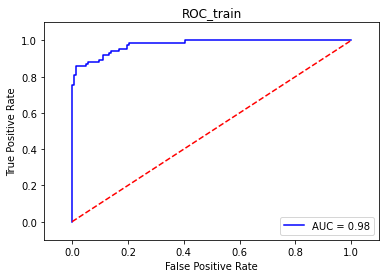

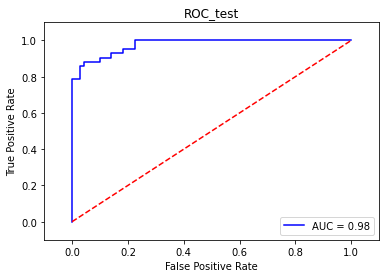

confusion_matrix_train: 
 [[140   3]
 [ 12  73]]
confusion_matrix_test: 
 [[69  2]
 [ 9 33]]
average_accuracy_train: 0.9191520467836258
average_precision_train: 0.9557804345181
average_recall_train: 0.8207843137254903
average_f1_train: 0.8822412116020907
average_auc_train: 0.8992033456739341
average_accuracy_test: 0.8994100294985249
average_precision_test: 0.9514465268023143
average_recall_test: 0.769047619047619
average_f1_test: 0.8501211371016707
average_auc_test: 0.8727867203219316


In [101]:
accuracy_list = []
precision_list = []
recall_list = []
f1_score_list = []
auc_list = []

accuracy_list2 = []
precision_list2 = []
recall_list2 = []
f1_score_list2 = []
auc_list2 = []

for _ in range(30):

    x_train = labeled_data.iloc[:, 1:]
    x_train = preprocessing.normalize(x_train)
    y_train = labeled_data.iloc[:, :1]

    # grid search for best C
    grid = GridSearchCV(svm.LinearSVC(penalty='l1', dual=False), param_grid={'C':[0.01, 0.1, 1, 10]}, cv=5)
    grid.fit(x_train, y_train)

    # model
    model = svm.LinearSVC(penalty='l1', C=grid.best_params_['C'], dual=False)
    model.fit(x_train, y_train)
        
    # unlabel_x_train as the unlabeled data
    # find the farthest unlabeled data
    unlabel_x = unlabeled_data.iloc[:, 1:]
    while len(unlabel_x) > 0:
        # calculate the distance of each data
        distance_decision_boundary = model.decision_function(unlabel_x)
        abs_distance = np.abs(distance_decision_boundary)
        # get the index of max distance
        indx = abs_distance.argmax()
        # get the label for farthest point
        label_predict = 0 if distance_decision_boundary[indx] < 0 else 1
        # append new label into train set
        new_x_train = np.append(x_train, [unlabel_x.iloc[indx]], axis = 0)
        new_y_train = np.vstack((np.array(y_train), np.array(label_predict).reshape(-1,1)))
        # delete label from test set
        unlabel_x = unlabel_x.drop(unlabel_x.index[indx])
        # refit the model
        model.fit(new_x_train, new_y_train)

    # predict
    y_pred_train = model.predict(x_train)
    y_pred = model.predict(x_test)
    
    accuracy_list.append(accuracy_score(y_train, y_pred_train))
    precision_list.append(precision_score(y_train, y_pred_train))
    recall_list.append(recall_score(y_train, y_pred_train))
    f1_score_list.append(f1_score(y_train, y_pred_train))
    auc_list.append(roc_auc_score(y_train, y_pred_train))
    
    accuracy_list2.append(accuracy_score(y_test, y_pred))
    precision_list2.append(precision_score(y_test, y_pred))
    recall_list2.append(recall_score(y_test, y_pred))
    f1_score_list2.append(f1_score(y_test, y_pred))
    auc_list2.append(roc_auc_score(y_test, y_pred))
    
    if _ == 0:
        # plot roc
        y_probs_train = model.decision_function(x_train)
        fpr, tpr, thresholds = roc_curve(y_train, y_probs_train, pos_label=1, sample_weight=None, drop_intermediate=True)
        roc_auc = auc(fpr, tpr)                                

        plt.plot(fpr, tpr, 'b', label='AUC = %0.2f'% roc_auc)
        plt.legend(loc='lower right')
        plt.plot([0,1],[0,1],'r--')
        plt.xlim([-0.1,1.1])
        plt.ylim([-0.1,1.1])
        plt.xlabel('False Positive Rate')                    
        plt.ylabel('True Positive Rate')                       
        plt.title('ROC_train')
        plt.show()
        
        # plot roc
        y_probs = model.decision_function(x_test)
        fpr, tpr, thresholds = roc_curve(y_test, y_probs, pos_label=1, sample_weight=None, drop_intermediate=True)
        roc_auc = auc(fpr, tpr)                                

        plt.plot(fpr, tpr, 'b', label='AUC = %0.2f'% roc_auc)
        plt.legend(loc='lower right')
        plt.plot([0,1],[0,1],'r--')
        plt.xlim([-0.1,1.1])
        plt.ylim([-0.1,1.1])
        plt.xlabel('False Positive Rate')                    
        plt.ylabel('True Positive Rate')                       
        plt.title('ROC_test')
        plt.show()
        
        # confusion matrix for train/test set
        cm_train = confusion_matrix(y_train, y_pred_train)
        cm_test = confusion_matrix(y_test, y_pred)
        print('confusion_matrix_train:', '\n', cm_train)
        print('confusion_matrix_test:', '\n', cm_test)
        
print('average_accuracy_train:', np.mean(accuracy_list))
print('average_precision_train:', np.mean(precision_list))
print('average_recall_train:', np.mean(recall_list))
print('average_f1_train:', np.mean(f1_score_list))
print('average_auc_train:', np.mean(auc_list))

print('average_accuracy_test:', np.mean(accuracy_list2))
print('average_precision_test:', np.mean(precision_list2))
print('average_recall_test:', np.mean(recall_list2))
print('average_f1_test:', np.mean(f1_score_list2))
print('average_auc_test:', np.mean(auc_list2))

#### (iii) Unsupervised Learning

- Run the k-means algorithm multiple times. 
- Make sure that you initialize the algoritm randomly. 
- How do you make sure that the algorithm was not trapped in a local minimum

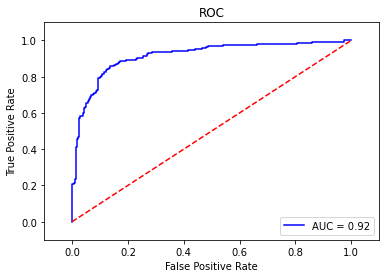

confusion_matrix_train: 
 [[279   7]
 [ 43 127]]
average_accuracy: 0.8903508771929826
average_precision: 0.9477611940298509
average_recall: 0.7470588235294116
average_f1: 0.8355263157894736
average_auc: 0.8612916495269436


In [114]:
def get_euclidean_distance(arr1, arr2):
    return sum((arr1 - arr2) ** 2) ** 0.5

accuracy_list = []
precision_list = []
recall_list = []
f1_score_list = []
auc_list = []

x = train_set.iloc[:, 1:]
x = preprocessing.normalize(x)
x = pd.DataFrame(x)
for _ in range(30):
    
    model = KMeans(n_clusters=2).fit(x)

    x_labeled = pd.concat([x, pd.DataFrame(model.labels_.reshape(-1,1), columns=['label'])], axis=1)
    cluster0 = x_labeled.query('label == 0')
    cluster1 = x_labeled.query('label == 1')
    cluster0_points = np.array(cluster0.iloc[:,:-1])
    cluster1_points = np.array(cluster1.iloc[:,:-1])
    cluster0_centroid = sum(cluster0_points) / len(cluster0_points)
    cluster1_centroid = sum(cluster1_points) / len(cluster1_points)

    # get cluster0_label
    distance_list = []
    for i in range(len(cluster0_points)):
        distance_list.append((get_euclidean_distance(cluster0_points[i], cluster0_centroid), i))
    index_30 = [i[1] for i in sorted(distance_list)[:30]]
    original_label = []
    for i in index_30:
        original_label.append(train_set.loc[cluster0.index[i]][1])
    cluster0_label = int(stats.mode(original_label)[0][0])

    # get cluster1_label
    distance_list = []
    for i in range(len(cluster1_points)):
        distance_list.append((get_euclidean_distance(cluster1_points[i], cluster1_centroid), i))
    index_30 = [i[1] for i in sorted(distance_list)[:30]]
    original_label = []
    for i in index_30:
        original_label.append(train_set.loc[cluster1.index[i]][1])
    cluster1_label = int(stats.mode(original_label)[0][0])

    x.loc[cluster0.index, 'new_label'] = cluster0_label
    x.loc[cluster1.index, 'new_label'] = cluster1_label

    y_pred_train = x['new_label']
    y_train = train_set[1]
    
    accuracy_list.append(accuracy_score(y_train, y_pred_train))
    precision_list.append(precision_score(y_train, y_pred_train))
    recall_list.append(recall_score(y_train, y_pred_train))
    f1_score_list.append(f1_score(y_train, y_pred_train))
    auc_list.append(roc_auc_score(y_train, y_pred_train))
    
    if _ == 0:
        # plot roc
        y_probs_train = pd.DataFrame(model.transform(x.iloc[:,:-1])).iloc[:,0]
        fpr, tpr, thresholds = roc_curve(y_train, y_probs_train, pos_label=1, sample_weight=None, drop_intermediate=True)
        roc_auc = auc(fpr, tpr)                                

        plt.plot(fpr, tpr, 'b', label='AUC = %0.2f'% roc_auc)
        plt.legend(loc='lower right')
        plt.plot([0,1],[0,1],'r--')
        plt.xlim([-0.1,1.1])
        plt.ylim([-0.1,1.1])
        plt.xlabel('False Positive Rate')                    
        plt.ylabel('True Positive Rate')                       
        plt.title('ROC')
        plt.show()
        
        # confusion matrix for train/test set
        cm_train = confusion_matrix(y_train, y_pred_train)
        print('confusion_matrix_train:', '\n', cm_train)
        
print('average_accuracy:', np.mean(accuracy_list))
print('average_precision:', np.mean(precision_list))
print('average_recall:', np.mean(recall_list))
print('average_f1:', np.mean(f1_score_list))
print('average_auc:', np.mean(auc_list))

**test_set**

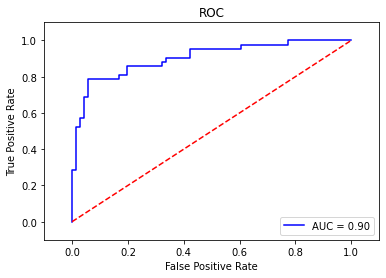

confusion_matrix_train: 
 [[71  0]
 [13 29]]
average_accuracy: 0.8849557522123892
average_precision: 1.0
average_recall: 0.6904761904761902
average_f1: 0.8169014084507042
average_auc: 0.8452380952380951


In [115]:
def get_euclidean_distance(arr1, arr2):
    return sum((arr1 - arr2) ** 2) ** 0.5

accuracy_list = []
precision_list = []
recall_list = []
f1_score_list = []
auc_list = []

x = test_set.iloc[:, 1:]
x = preprocessing.normalize(x)
x = pd.DataFrame(x)
for _ in range(30):
    
    model = KMeans(n_clusters=2).fit(x)

    x_labeled = pd.concat([x, pd.DataFrame(model.labels_.reshape(-1,1), columns=['label'])], axis=1)
    cluster0 = x_labeled.query('label == 0')
    cluster1 = x_labeled.query('label == 1')
    cluster0_points = np.array(cluster0.iloc[:,:-1])
    cluster1_points = np.array(cluster1.iloc[:,:-1])
    cluster0_centroid = sum(cluster0_points) / len(cluster0_points)
    cluster1_centroid = sum(cluster1_points) / len(cluster1_points)

    # get cluster0_label
    distance_list = []
    for i in range(len(cluster0_points)):
        distance_list.append((get_euclidean_distance(cluster0_points[i], cluster0_centroid), i))
    index_30 = [i[1] for i in sorted(distance_list)[:30]]
    original_label = []
    for i in index_30:
        original_label.append(test_set.loc[cluster0.index[i]][1])
    cluster0_label = int(stats.mode(original_label)[0][0])

    # get cluster1_label
    distance_list = []
    for i in range(len(cluster1_points)):
        distance_list.append((get_euclidean_distance(cluster1_points[i], cluster1_centroid), i))
    index_30 = [i[1] for i in sorted(distance_list)[:30]]
    original_label = []
    for i in index_30:
        original_label.append(test_set.loc[cluster1.index[i]][1])
    cluster1_label = int(stats.mode(original_label)[0][0])

    x.loc[cluster0.index, 'new_label'] = cluster0_label
    x.loc[cluster1.index, 'new_label'] = cluster1_label

    y_pred = x['new_label']
    y_test = test_set[1]
    
    accuracy_list.append(accuracy_score(y_test, y_pred))
    precision_list.append(precision_score(y_test, y_pred))
    recall_list.append(recall_score(y_test, y_pred))
    f1_score_list.append(f1_score(y_test, y_pred))
    auc_list.append(roc_auc_score(y_test, y_pred))
    
    if _ == 0:
        # plot roc
        y_probs = pd.DataFrame(model.transform(x.iloc[:,:-1])).iloc[:,0]
        fpr, tpr, thresholds = roc_curve(y_test, y_probs, pos_label=1, sample_weight=None, drop_intermediate=True)
        roc_auc = auc(fpr, tpr)                                

        plt.plot(fpr, tpr, 'b', label='AUC = %0.2f'% roc_auc)
        plt.legend(loc='lower right')
        plt.plot([0,1],[0,1],'r--')
        plt.xlim([-0.1,1.1])
        plt.ylim([-0.1,1.1])
        plt.xlabel('False Positive Rate')                    
        plt.ylabel('True Positive Rate')                       
        plt.title('ROC')
        plt.show()
        
        # confusion matrix for train/test set
        cm_test = confusion_matrix(y_test, y_pred)
        print('confusion_matrix_train:', '\n', cm_test)
        
print('average_accuracy:', np.mean(accuracy_list))
print('average_precision:', np.mean(precision_list))
print('average_recall:', np.mean(recall_list))
print('average_f1:', np.mean(f1_score_list))
print('average_auc:', np.mean(auc_list))

#### (iv) Spectral Clustering

In [117]:
accuracy_list = []
precision_list = []
recall_list = []
f1_score_list = []
auc_list = []

x = train_set.iloc[:, 1:]
x = preprocessing.normalize(x)
x = pd.DataFrame(x)
for _ in range(30):
    
    model = SpectralClustering(n_clusters=2, gamma=1, affinity='rbf').fit(x)

    x_labeled = pd.concat([x, pd.DataFrame(model.labels_.reshape(-1,1), columns=['label'])], axis=1)
    cluster0 = x_labeled.query('label == 0')
    cluster1 = x_labeled.query('label == 1')
    cluster0_points = np.array(cluster0.iloc[:,:-1])
    cluster1_points = np.array(cluster1.iloc[:,:-1])
    cluster0_centroid = sum(cluster0_points) / len(cluster0_points)
    cluster1_centroid = sum(cluster1_points) / len(cluster1_points)

    # get cluster0_label
    index_30 = np.random.choice(range(len(cluster0_points)), size=30, replace=False)
    original_label = []
    for i in index_30:
        original_label.append(train_set.loc[cluster0.index[i]][1])
    cluster0_label = int(stats.mode(original_label)[0][0])

    # get cluster1_label
    index_30 = np.random.choice(range(len(cluster1_points)), size=30, replace=False)
    original_label = []
    for i in index_30:
        original_label.append(train_set.loc[cluster1.index[i]][1])
    cluster1_label = int(stats.mode(original_label)[0][0])

    x.loc[cluster0.index, 'new_label'] = cluster0_label
    x.loc[cluster1.index, 'new_label'] = cluster1_label

    y_pred_train = x['new_label']
    y_train = train_set[1]
    
    accuracy_list.append(accuracy_score(y_train, y_pred_train))
    precision_list.append(precision_score(y_train, y_pred_train))
    recall_list.append(recall_score(y_train, y_pred_train))
    f1_score_list.append(f1_score(y_train, y_pred_train))
    auc_list.append(roc_auc_score(y_train, y_pred_train))
    
    if _ == 0:
        # confusion matrix for train/test set
        cm_train = confusion_matrix(y_train, y_pred_train)
        print('confusion_matrix_train:', '\n', cm_train)
        
print('average_accuracy:', np.mean(accuracy_list))
print('average_precision:', np.mean(precision_list))
print('average_recall:', np.mean(recall_list))
print('average_f1:', np.mean(f1_score_list))
print('average_auc:', np.mean(auc_list))

confusion_matrix_train: 
 [[280   6]
 [ 48 122]]
average_accuracy: 0.881578947368421
average_precision: 0.953125
average_recall: 0.7176470588235296
average_f1: 0.8187919463087248
average_auc: 0.8483340189222546


**test set**

In [130]:
accuracy_list = []
precision_list = []
recall_list = []
f1_score_list = []
auc_list = []

x = test_set.iloc[:, 1:]
x = preprocessing.normalize(x)
x = pd.DataFrame(x)
for _ in range(30):
    
    model = SpectralClustering(n_clusters=2, gamma=1, affinity='rbf').fit(x)

    x_labeled = pd.concat([x, pd.DataFrame(model.labels_.reshape(-1,1), columns=['label'])], axis=1)
    cluster0 = x_labeled.query('label == 0')
    cluster1 = x_labeled.query('label == 1')
    cluster0_points = np.array(cluster0.iloc[:,:-1])
    cluster1_points = np.array(cluster1.iloc[:,:-1])
    cluster0_centroid = sum(cluster0_points) / len(cluster0_points)
    cluster1_centroid = sum(cluster1_points) / len(cluster1_points)

    # get cluster0_label
    index_30 = np.random.choice(range(len(cluster0_points)), size=30)
    original_label = []
    for i in index_30:
        original_label.append(test_set.loc[cluster0.index[i]][1])
    cluster0_label = int(stats.mode(original_label)[0][0])

    # get cluster1_label
    index_30 = np.random.choice(range(len(cluster1_points)), size=30)
    original_label = []
    for i in index_30:
        original_label.append(test_set.loc[cluster1.index[i]][1])
    cluster1_label = int(stats.mode(original_label)[0][0])

    x.loc[cluster0.index, 'new_label'] = cluster0_label
    x.loc[cluster1.index, 'new_label'] = cluster1_label

    y_pred_train = x['new_label']
    y_train = test_set[1]
    
    accuracy_list.append(accuracy_score(y_train, y_pred_train))
    precision_list.append(precision_score(y_train, y_pred_train))
    recall_list.append(recall_score(y_train, y_pred_train))
    f1_score_list.append(f1_score(y_train, y_pred_train))
    auc_list.append(roc_auc_score(y_train, y_pred_train))
    
    if _ == 0:
        # confusion matrix for train/test set
        cm_train = confusion_matrix(y_train, y_pred_train)
        print('confusion_matrix_train:', '\n', cm_train)
        
print('average_accuracy:', np.mean(accuracy_list))
print('average_precision:', np.mean(precision_list))
print('average_recall:', np.mean(recall_list))
print('average_f1:', np.mean(f1_score_list))
print('average_auc:', np.mean(auc_list))

confusion_matrix_train: 
 [[71  0]
 [13 29]]
average_accuracy: 0.8849557522123892
average_precision: 1.0
average_recall: 0.6904761904761902
average_f1: 0.8169014084507042
average_auc: 0.8452380952380951


#### (v) Compare

**According to the results, supervised learning and semi-supervised learning have better performance.**

supervised learning:  
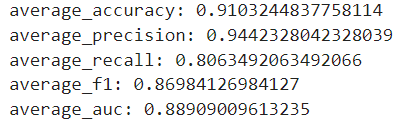  
  
semi-supervised learning  
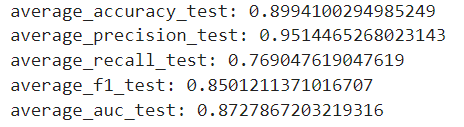   
  
unsupervised learning(kmeans)  
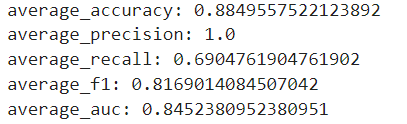  
  
unsupervised learning(spectralclustering)  
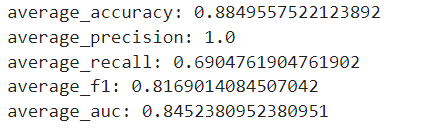

## Active Learning Using Support Vector Machines

### (a) download

In [8]:
data = pd.read_csv('../data/data_banknote_authentication.txt', header=None)
train, test = train_test_split(data, test_size=472/1372)
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

In [10]:
train

,0,1,2,3,4
0,-1.13130,1.9037,7.53390,1.02200,0
1,-3.27780,1.8023,0.18050,-2.39310,1
2,1.21980,2.0982,-3.19540,0.12843,1
3,-3.89520,3.8157,-0.31304,-3.81940,1
4,4.25860,11.2962,-4.09430,-4.34570,0
...,...,...,...,...,...
895,-0.76794,3.4598,-3.44050,-3.42760,1
896,1.52680,-5.5871,8.65640,-1.72200,0
897,4.16050,11.2196,-3.61360,-4.08190,0
898,0.55939,-0.3104,0.18307,0.44653,1


### (b) passive/active learning

In [80]:
# passive learning

test_error_list_passive_50 = []

for _ in range(50):

    test_error_list_passive = []

    index_total = train.index
    
    index_10 = []
    
    for i in range(90):

        new_10 = np.random.choice(index_total, size=10, replace=False)
        
        index_10 = np.hstack((new_10, index_10))
            
        ss = StandardScaler()
        x_train = train.loc[index_10].iloc[:,:-1]
        x_train = ss.fit_transform(x_train)
        y_train = train.loc[index_10].iloc[:,-1:]

        x_test = test.iloc[:,:-1]
        x_test = ss.transform(x_test)
        y_test = test.iloc[:,-1:]

        # grid search for best C
        grid = GridSearchCV(svm.LinearSVC(penalty='l1', dual=False), param_grid={'C':[0.01, 0.1, 1, 10]}, cv=5)
        grid.fit(x_train, y_train)

        # model
        model = svm.LinearSVC(penalty='l1', C=grid.best_params_['C'], dual=False)
        model.fit(x_train, y_train)

        # predict
        y_pred = model.predict(x_test)

        # test error
        test_error = 1 - accuracy_score(y_test, y_pred)
        test_error_list_passive.append(test_error)

        index_total = list(set(index_total) - set(new_10))
    
    test_error_list_passive_50.append(test_error_list_passive)
    
    print('Round:', _)

Round: 0
Round: 1
Round: 2
Round: 3
Round: 4
Round: 5
Round: 6
Round: 7
Round: 8
Round: 9
Round: 10
Round: 11
Round: 12
Round: 13
Round: 14
Round: 15
Round: 16
Round: 17
Round: 18
Round: 19
Round: 20
Round: 21
Round: 22
Round: 23
Round: 24
Round: 25
Round: 26
Round: 27
Round: 28
Round: 29
Round: 30
Round: 31
Round: 32
Round: 33
Round: 34
Round: 35
Round: 36
Round: 37
Round: 38
Round: 39
Round: 40
Round: 41
Round: 42
Round: 43
Round: 44
Round: 45
Round: 46
Round: 47
Round: 48
Round: 49


In [93]:
# 50 times test error passive learning
pd.DataFrame(test_error_list_passive_50)

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
0,0.167373,0.133475,0.021186,0.027542,0.027542,0.025424,0.021186,0.021186,0.021186,0.040254,...,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356
1,0.114407,0.148305,0.042373,0.036017,0.025424,0.033898,0.025424,0.033898,0.025424,0.029661,...,0.010593,0.010593,0.010593,0.010593,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356
2,0.046610,0.033898,0.033898,0.027542,0.029661,0.031780,0.021186,0.012712,0.012712,0.012712,...,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.008475,0.006356
3,0.207627,0.154661,0.021186,0.021186,0.021186,0.031780,0.021186,0.031780,0.023305,0.021186,...,0.021186,0.021186,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356
4,0.182203,0.165254,0.167373,0.027542,0.025424,0.023305,0.031780,0.029661,0.010593,0.029661,...,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.010593,0.006356
5,0.091102,0.038136,0.040254,0.036017,0.038136,0.038136,0.033898,0.044492,0.029661,0.036017,...,0.010593,0.010593,0.010593,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356
6,0.027542,0.036017,0.038136,0.038136,0.031780,0.033898,0.029661,0.029661,0.029661,0.023305,...,0.010593,0.006356,0.006356,0.006356,0.006356,0.010593,0.010593,0.006356,0.006356,0.006356
7,0.186441,0.175847,0.158898,0.048729,0.055085,0.052966,0.057203,0.038136,0.033898,0.029661,...,0.010593,0.006356,0.006356,0.006356,0.006356,0.010593,0.010593,0.010593,0.006356,0.006356
8,0.186441,0.180085,0.163136,0.063559,0.029661,0.076271,0.033898,0.029661,0.027542,0.029661,...,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.006356,0.006356,0.006356
9,0.038136,0.050847,0.036017,0.031780,0.036017,0.031780,0.033898,0.038136,0.042373,0.042373,...,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356


In [82]:
# active learning

test_error_list_active_50 = []

for _ in range(50):

    test_error_list_active = []

    index_total = train.index
    
    index_10 = np.random.choice(index_total, size=10, replace=False)
    
    indx = index_10
    
    for i in range(90):
            
        ss = StandardScaler()
        x_train = train.loc[index_10].iloc[:,:-1]
        x_train = ss.fit_transform(x_train)
        y_train = train.loc[index_10].iloc[:,-1:]

        x_test = test.iloc[:,:-1]
        x_test = ss.transform(x_test)
        y_test = test.iloc[:,-1:]

        # grid search for best C
        grid = GridSearchCV(svm.LinearSVC(penalty='l1', dual=False), param_grid={'C':[0.01, 0.1, 1, 10]}, cv=5)
        grid.fit(x_train, y_train)

        # model
        model = svm.LinearSVC(penalty='l1', C=grid.best_params_['C'], dual=False)
        model.fit(x_train, y_train)

        # predict
        y_pred = model.predict(x_test)

        # test error
        test_error = 1 - accuracy_score(y_test, y_pred)
        test_error_list_active.append(test_error)

        index_total = list(set(index_total) - set(indx))
        
        if index_total:
            # closest 10 data points
            distance_decision_boundary = model.decision_function(train.loc[index_total].iloc[:,:-1])
            closest_indexes = np.argsort(abs(distance_decision_boundary))[:10]
            indx = []
            for j in closest_indexes:
                indx.append(index_total[j])

            index_10 = np.hstack((np.array(indx), index_10))

    test_error_list_active_50.append(test_error_list_active)
            
    print('Round:', _)

Round: 0
Round: 1
Round: 2
Round: 3
Round: 4
Round: 5
Round: 6
Round: 7
Round: 8
Round: 9
Round: 10
Round: 11
Round: 12
Round: 13
Round: 14
Round: 15
Round: 16
Round: 17
Round: 18
Round: 19
Round: 20
Round: 21
Round: 22
Round: 23
Round: 24
Round: 25
Round: 26
Round: 27
Round: 28
Round: 29
Round: 30
Round: 31
Round: 32
Round: 33
Round: 34
Round: 35
Round: 36
Round: 37
Round: 38
Round: 39
Round: 40
Round: 41
Round: 42
Round: 43
Round: 44
Round: 45
Round: 46
Round: 47
Round: 48
Round: 49


In [92]:
# 50 times test error active learning
pd.DataFrame(test_error_list_active_50)

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
0,0.169492,0.029661,0.059322,0.052966,0.057203,0.012712,0.014831,0.014831,0.014831,0.014831,...,0.021186,0.021186,0.021186,0.021186,0.021186,0.021186,0.033898,0.033898,0.033898,0.033898
1,0.243644,0.069915,0.095339,0.144068,0.025424,0.029661,0.029661,0.031780,0.036017,0.038136,...,0.021186,0.021186,0.021186,0.021186,0.021186,0.021186,0.021186,0.021186,0.033898,0.033898
2,0.175847,0.025424,0.023305,0.029661,0.029661,0.029661,0.057203,0.046610,0.046610,0.029661,...,0.021186,0.021186,0.021186,0.021186,0.021186,0.021186,0.021186,0.021186,0.021186,0.033898
3,0.033898,0.036017,0.033898,0.031780,0.036017,0.036017,0.031780,0.061441,0.033898,0.012712,...,0.021186,0.021186,0.021186,0.021186,0.021186,0.021186,0.021186,0.021186,0.021186,0.021186
4,0.133475,0.038136,0.072034,0.016949,0.016949,0.044492,0.014831,0.014831,0.014831,0.014831,...,0.021186,0.021186,0.033898,0.033898,0.033898,0.033898,0.033898,0.033898,0.033898,0.033898
5,0.025424,0.097458,0.057203,0.057203,0.057203,0.052966,0.067797,0.069915,0.069915,0.069915,...,0.021186,0.021186,0.021186,0.021186,0.033898,0.033898,0.033898,0.033898,0.033898,0.033898
6,0.476695,0.029661,0.033898,0.029661,0.029661,0.033898,0.040254,0.040254,0.129237,0.023305,...,0.006356,0.006356,0.006356,0.006356,0.006356,0.021186,0.006356,0.006356,0.006356,0.006356
7,0.158898,0.042373,0.038136,0.036017,0.069915,0.069915,0.031780,0.031780,0.031780,0.031780,...,0.021186,0.021186,0.021186,0.021186,0.033898,0.033898,0.033898,0.033898,0.033898,0.033898
8,0.048729,0.063559,0.122881,0.116525,0.122881,0.101695,0.112288,0.110169,0.099576,0.080508,...,0.021186,0.021186,0.021186,0.021186,0.033898,0.033898,0.033898,0.033898,0.033898,0.033898
9,0.101695,0.137712,0.076271,0.040254,0.040254,0.038136,0.040254,0.040254,0.082627,0.025424,...,0.021186,0.021186,0.021186,0.021186,0.021186,0.021186,0.021186,0.021186,0.021186,0.021186


### (c) learning curve

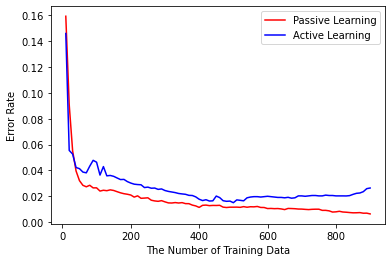

In [91]:
#plot the average result
plt.plot(np.arange(1,91)*10, sum(np.array(test_error_list_passive_50)) / len(np.array(test_error_list_passive_50)), c='r',label='Passive Learning')
plt.plot(np.arange(1,91)*10, sum(np.array(test_error_list_active_50)) / len(np.array(test_error_list_active_50)), c='b', label='Active Learning')
plt.xlabel('The Number of Training Data')
plt.ylabel('Error Rate')
plt.legend()
plt.show()

**Conclusion:  
When the data size is small, the two methods have similar test errors. However, when the data size becomes large, active learning in this case seems to have higher error rate.(which is confusing, i don't know why)**